In [1]:
# Allow reloading of libraries without restarting the kernel
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import torch

from pathlib import Path

from lynx_id.data.dataset import LynxDataset
from lynx_id.data.transformations_and_augmentations import transforms
from torch.utils.data import DataLoader
from lynx_id.data.collate import collate_single
from lynx_id.model.embeddings import EmbeddingModel
from lynx_id.model.clustering import ClusteringModel

In [4]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"{DEVICE=}")

DEVICE='cuda'


In [5]:
IMAGE_FOLDER = "/gpfswork/rech/ads/uxp55sd/DP-SCR_Identify-and-estimate-density-lynx-population/test_scripts/data"

In [6]:
dataset = LynxDataset(
    folder_path_images=IMAGE_FOLDER,
    inference=True,
    loader='pil',
    transform=transforms,
    probabilities=[1, 0, 0],
    mode='single',
    device='auto'
)

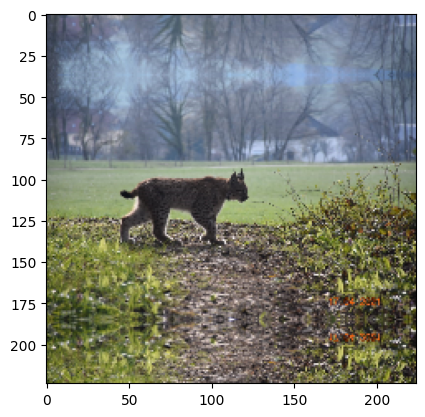

In [7]:
plt.imshow(dataset[1][0]['image'].permute(1,2,0))

In [8]:
dataloader = DataLoader(
    dataset,
    batch_size=32,
    shuffle=False,
    num_workers=4,
    collate_fn=collate_single
)

In [9]:
embedding_model = EmbeddingModel(
    model_path="/gpfswork/rech/ads/uxp55sd/downloaded_model/model_best_0.512.pth",
    device=DEVICE
) 

/gpfslocalsup/pub/anaconda-py3/2023.09/envs/pytorch-gpu-2.1.1+py3.11.5/lib/python3.11/site-packages/torchvision-0.16.1+fdea156-py3.11-linux-x86_64.egg/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/gpfslocalsup/pub/anaconda-py3/2023.09/envs/pytorch-gpu-2.1.1+py3.11.5/lib/python3.11/site-packages/torchvision-0.16.1+fdea156-py3.11-linux-x86_64.egg/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [10]:
embeddings = embedding_model.compute_embeddings(dataloader)

100%|██████████| 1/1 [00:01<00:00,  1.08s/it]


In [11]:
embeddings.shape

torch.Size([2, 2048])

In [16]:
clustering_model = ClusteringModel(
    embeddings_knowledge="/gpfswork/rech/ads/uxp55sd/DP-SCR_Identify-and-estimate-density-lynx-population/test_scripts/embeddings/embeddings_france.safetensors",
    lynx_ids_knowledge="/gpfswork/rech/ads/uxp55sd/DP-SCR_Identify-and-estimate-density-lynx-population/test_scripts/embeddings/embeddings_france_lynx_ids.csv",
    n_neighbors=5,
    algorithm="brute",
    metric="minkowski",
)

In [17]:
candidates_nearest_neighbors, candidates_1_knn, candidates_n_knn, candidates_predicted_new = clustering_model.clustering(embeddings.cpu())

In [18]:
clustering_model.distances

array([[2.41968431e-06, 6.88139618e-01, 7.16470712e-01, 7.52792524e-01,
        7.58691416e-01],
       [1.67742339e-06, 1.24970771e+00, 1.32215099e+00, 1.32406795e+00,
        1.33039223e+00]])

In [19]:
candidates_1_knn

['B439', '2327']

In [33]:
clustering_model.check_new_individual(
    embeddings=embeddings,
    candidates_predicted=candidates_1_knn,
    threshold=0.5
)

['B439', '2327']

In [35]:
len(candidates_1_knn)

[autoreload of lynx_id.model.clustering failed: Traceback (most recent call last):
  File "/gpfslocalsup/pub/anaconda-py3/2023.09/envs/pytorch-gpu-2.1.1+py3.11.5/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/gpfslocalsup/pub/anaconda-py3/2023.09/envs/pytorch-gpu-2.1.1+py3.11.5/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/gpfslocalsup/pub/anaconda-py3/2023.09/envs/pytorch-gpu-2.1.1+py3.11.5/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 936, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1074, in get_code
  File "<frozen importlib._bootstrap_external>", line 1004, in source_to_code
  File "<frozen importlib._boo

2

In [36]:
dataset.dataframe

[autoreload of lynx_id.model.clustering failed: Traceback (most recent call last):
  File "/gpfslocalsup/pub/anaconda-py3/2023.09/envs/pytorch-gpu-2.1.1+py3.11.5/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/gpfslocalsup/pub/anaconda-py3/2023.09/envs/pytorch-gpu-2.1.1+py3.11.5/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/gpfslocalsup/pub/anaconda-py3/2023.09/envs/pytorch-gpu-2.1.1+py3.11.5/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 936, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1074, in get_code
  File "<frozen importlib._bootstrap_external>", line 1004, in source_to_code
  File "<frozen importlib._boo

,filepath
0,/gpfswork/rech/ads/uxp55sd/DP-SCR_Identify-and...
1,/gpfswork/rech/ads/uxp55sd/DP-SCR_Identify-and...
